# Example Plots
This notebook is a series of example plots. It contains examples of simple plots, fits and interactive plots. 

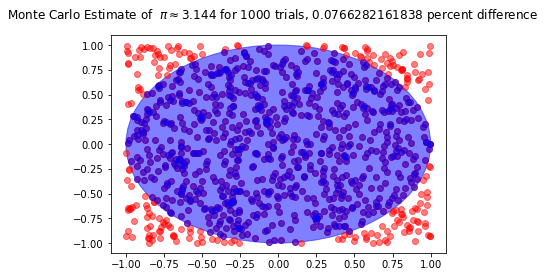

In [1]:
# interactive plot of finding pi using a monte-carlo approach
import matplotlib.pyplot as plt
import random
import math
def montecarlo_pi(number_experiments):
    """Finds pi using a montecarlo approach, by performing n random placements of points on a square and finding the
    number of points in a circle compared to the number of points in a square on the interval [0,1]"""
    x_positions=[random.uniform(-1,1) for i in range(number_experiments)]
    y_positions=[random.uniform(-1,1) for i in range(number_experiments)]
    
    # area of circle of radius  is pi, area of square=4, so pi=4*number_in_circle/number_in_square
    number_in_circle=0
    inside_x=[]
    inside_y=[]
    for index,value in enumerate(x_positions):
        if (value**2+y_positions[index]**2)<1.**2:
            number_in_circle+=1
            inside_x.append(value)
            inside_y.append(y_positions[index])
    #print number_in_circle
    pi_estimate=4.0*float(number_in_circle)/(float(number_experiments))
    plt.plot(x_positions,y_positions,'ro',alpha=0.5)
    plt.plot(inside_x,inside_y,'bo',alpha=0.5)
    plt.suptitle(r'Monte Carlo Estimate of  $\pi\approx%s $ for %s trials, %s percent difference'%(pi_estimate,
                                                                                            number_experiments,
                                                                                           100*(pi_estimate-math.pi)/math.pi))
    circle=plt.Circle((0,0), radius=1, color='b',  alpha=0.5)
    
    ax = plt.gca()
    ax.add_artist(circle)
    #ax.set_aspect('equal', 'datalim'
    plt.show()
montecarlo_pi(1000)

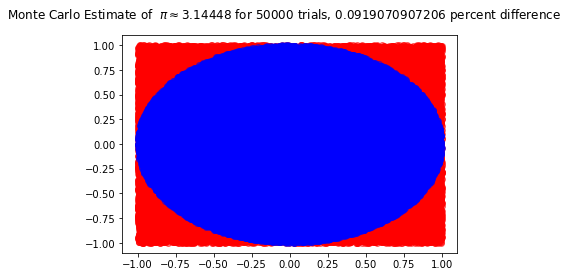

<function __main__.montecarlo_pi>

In [2]:
%matplotlib inline
from ipywidgets import *

interact(montecarlo_pi,number_experiments=(10,100000,10))

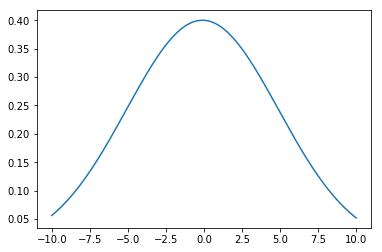

<function __main__.plot_gaussian_with_noise>

In [3]:
%matplotlib inline
from ipywidgets import *
import random
import numpy
import scipy
import scipy.optimize
import scipy.stats

def lorentzian_function(a,x):
    "a[0]=amplitude,a[1]=center,a[2]=FWHM"
    return a[0]*1/(1+(x-a[1])**2/(a[2]**2))

def gaussian_function(a,x):
    " a[0]=amplitude, a[1]=center, a[2]=std deviation"
    return a[0]*scipy.exp(-(x-a[1])**2/(2.0*a[2]**2))
def power_function(a,x):
    " a[0]=constant, a[1]=center, a[2]=std deviation"
    return a[0]+a[1]*x+a[2]*x**2

# Define the fit function that returns least square optimization
def fit(function,xdata,ydata,a0):
    fit_dictionary={}
    error_function=lambda a, xdata, ydata:function(a,xdata)-ydata
    a,succes=scipy.optimize.leastsq(error_function, a0,args=(xdata,ydata))
    return a


def plot_gaussian_with_noise(amplitude,mu,sigma,noise_distribution,noise_width,noise_center):
    xdata=numpy.linspace(-10,10,1000)
    a=[amplitude,mu,sigma]
    if noise_distribution in ['uniform']:
        left=noise_center-noise_width/2
        right=noise_center+noise_width/2
        [noise_width,noise_center]=[left,right]
        
    ydata=[gaussian_function(a,x)+random.__dict__[noise_distribution](noise_center,noise_width) for x in xdata]
    plt.plot(xdata,ydata)
    plt.show()
interact(plot_gaussian_with_noise,
         amplitude=(0.,1.,.1),mu=(-10,10,.1),sigma=(.1,10,.1),
         noise_distribution=('gauss','uniform','lognormvariate'),
         noise_width=(0,1,.01),noise_center=fixed(0))

In [40]:
def calculate_residuals(fit_function,a,xdata,ydata):
    """Given the fit function, a parameter vector, xdata, and ydata returns the residuals as [x,y] pairs"""
    output_x=xdata
    output_y=[fit_function(a,x)-ydata[index] for index,x in enumerate(xdata)]
    return [output_x,output_y]

def fit_and_plot(fit_function,xdata,ydata,a0=[1,1,1]):
    """fit and plot, fits xdata, ydata  with fit function and returns a plot of the fit overlaid with the data and 
    a plot of the residuals, including a histogram"""
    fit_results=fit(fit_function,xdata,ydata,a0)
    # To do 2 plots in 2 rows with shared axis
    fig, (ax0, ax1,ax2,ax3) = plt.subplots(nrows=4,figsize=(8,16))
    ax0.plot(xdata,ydata,'bo',label='data')
    ax0.plot(xdata,[fit_function(fit_results,x) for x in xdata],'r-',linewidth=3,label='fit')
    ax0.legend(loc='upper right', shadow=True)
    ax0.set_title('Fit of data using {0}'.format(fit_function.__name__))
    [x,y]=calculate_residuals(fit_function,fit_results,xdata,ydata)
    ax1.plot(x,y)
    ax1.set_title('Residuals')
    options={'fontsize':12}
    ax0.text(11,
             -.1,
             "a[0] = {0:3.2g}\na[1]= {1:3.2g}\na[2]= {2:3.2g}".format(fit_results[0],fit_results[1],fit_results[2]),
             **options)
    ax2.hist(y)
    ax2.set_title("Histogram of Residuals")
    power_spectrum=abs(numpy.fft.fft(y)*numpy.conjugate(numpy.fft.fft(y)))
    probability=power_spectrum/sum(power_spectrum)
    ax3.plot(power_spectrum)
    ax3.set_title('Power Spectrum of Residuals')
    ax3.text(1130,
             -.1,
             "spectral_entropy = {0:3.2g}\n".format(-sum(probability*numpy.log2(probability))/numpy.log2(len(probability))),
             **options)
    plt.tight_layout()
    plt.show()


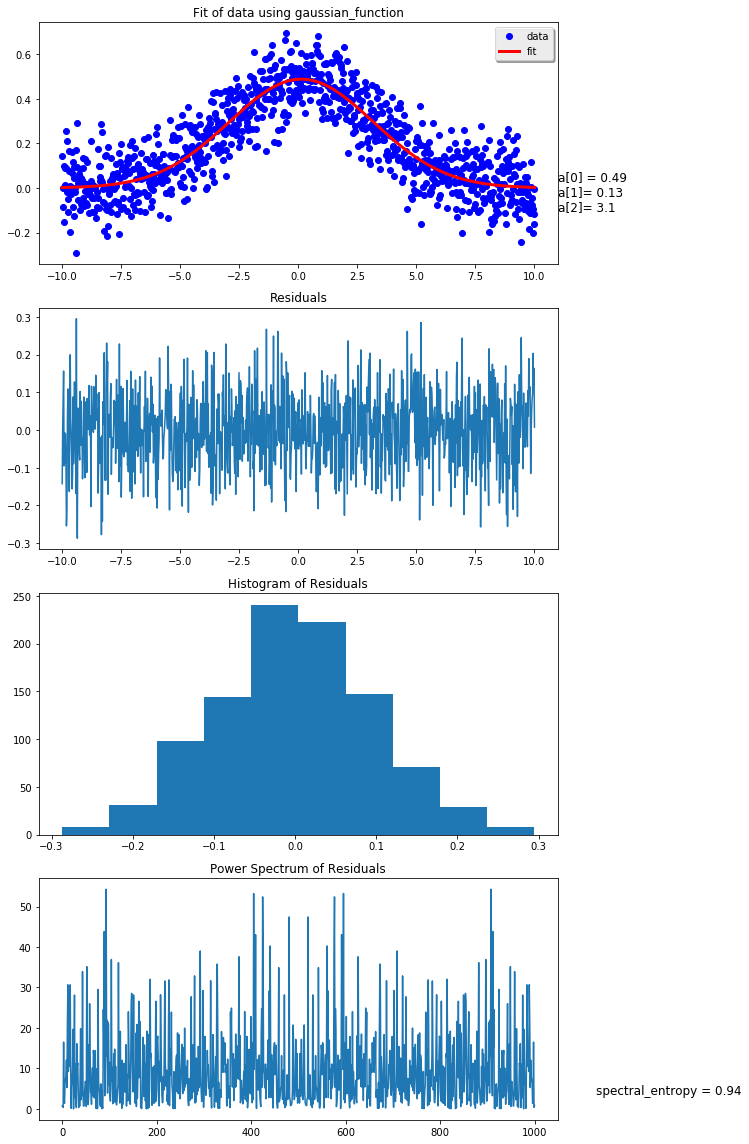

In [41]:
xdata=numpy.linspace(-10,10,1000)
ydata=[.5*scipy.exp(-(x-.1)**2/(2.0*3.0**2))+random.gauss(0,.1) for x in xdata]
fit_and_plot(gaussian_function,xdata,ydata)

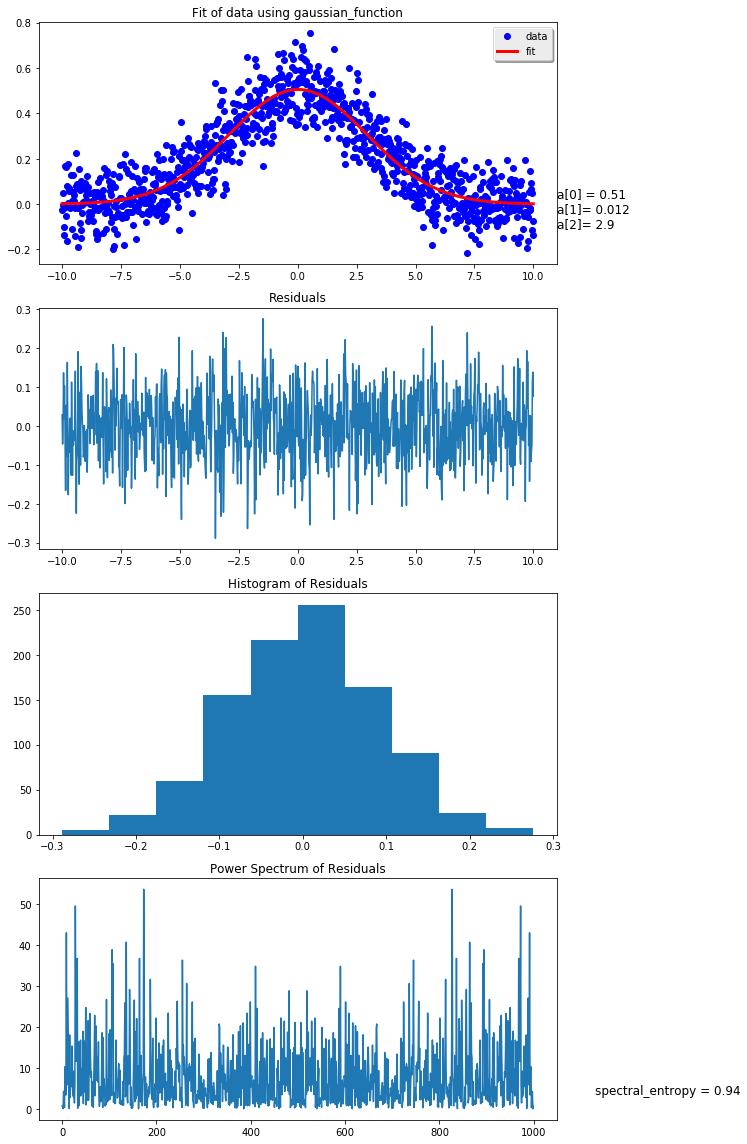

In [42]:

interact(lambda noise_sigma,noise_mu:fit_and_plot(gaussian_function,
                               xdata,
                               [.5*scipy.exp(-(x-.1)**2/(2.0*3.0**2))+random.gauss(noise_mu,noise_sigma) for x in xdata]),
         noise_sigma=(0,1,.01),
         noise_mu=(0,1,.01))

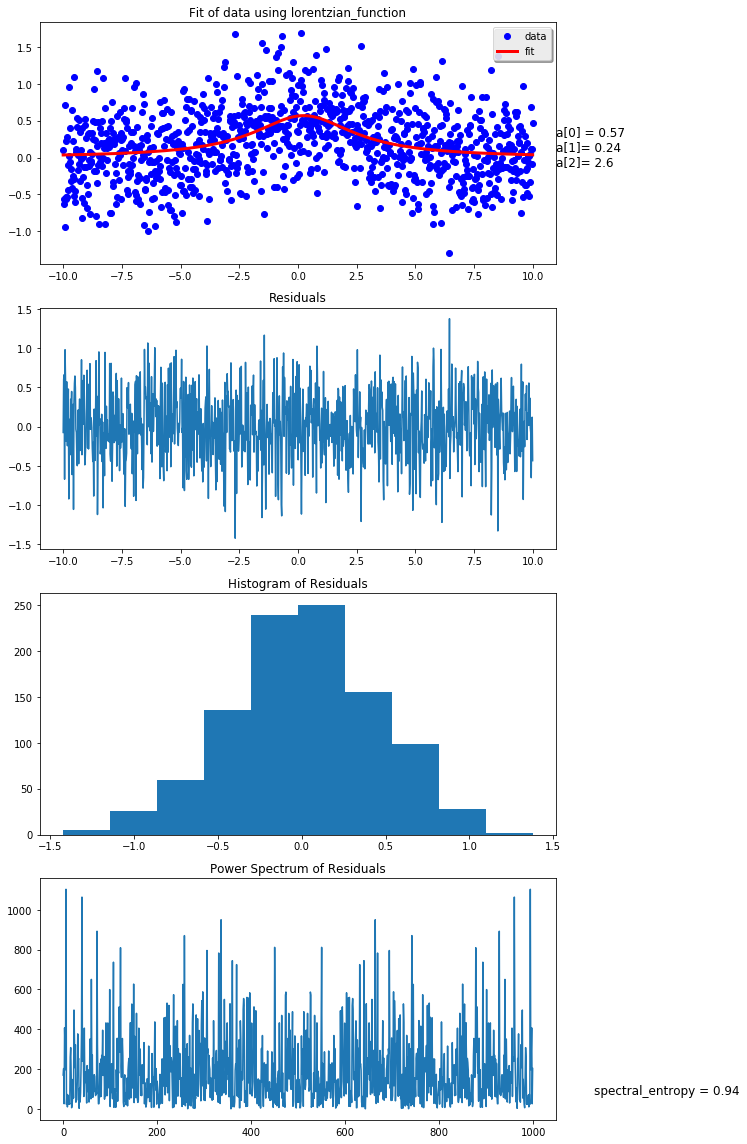

In [43]:
interact(lambda fit_function,noise_sigma,noise_mu:fit_and_plot(globals()[fit_function],
                               xdata,
                               [.5*scipy.exp(-(x-.1)**2/(2.0*3.0**2))+random.gauss(noise_mu,noise_sigma) for x in xdata]),
         fit_function=('gaussian_function','lorentzian_function','power_function'),
         noise_sigma=(0,1,.01),
         noise_mu=(0,1,.01))

In [50]:
# now we can create an interactive plot
# By passing a keyword set of parameters we can change which parameters that we interact with
from pyMez.Code.Analysis.Fitting import *
def plot_fit(**options):
    defaults= {"output_noise_type":"normal",
              "output_noise_width":2,
              "output_noise_center":0,
              "m":.5,
              "b":3.4,
              "delta":1,
              "x0":10,
              "alpha":20,
              "x_min":-25,
              "x_max":25,
              "number_points":1000}
    fit_options={}
    for key,value in defaults.iteritems():
        fit_options[key]=value
    for key,value in options.iteritems():
        fit_options[key]=value
    line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")
    gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")
    model=line+gaussian
    model_2=line+gaussian
    model.set_parameters(m=fit_options["m"],b=fit_options["b"],
                         delta=fit_options["delta"],x0=fit_options["x0"],alpha=fit_options["alpha"])
    simulated_data=DataSimulator(model=model,output_noise_type=fit_options["output_noise_type"],
                                 output_noise_width=fit_options["output_noise_width"],
                                 output_noise_center=fit_options["output_noise_center"])
    simulated_data.set_x(fit_options["x_min"],fit_options["x_max"],fit_options["number_points"])
    model_2.fit_data(simulated_data.x,simulated_data.data,**{"initial_guess":model.parameter_values})
    parameter_text="${0}$\n".format(sympy.latex(model_2.equation))
    options={'fontsize':12}
    for key,value in model_2.parameter_values.iteritems():
        parameter_text=parameter_text+"{0} = {1:3.2g} \n".format(key,value)
    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4,figsize=(8,16))
    ax0.plot(simulated_data.x,simulated_data.data,label="Data")
    ax0.plot(simulated_data.x,model_2(simulated_data.x),"ro",label="Fit")
    ax0.legend()
    ax1.text(fit_options["x_max"]+7,
             .1,
             parameter_text,
             fontsize=12)
    residuals=simulated_data.data-model_2(simulated_data.x)
    ax1.plot(simulated_data.x,residuals)
    ax1.set_title("Residuals")
    ax2.hist(residuals)
    ax2.set_title("Histogram of Residuals")
    power_spectrum=abs(numpy.fft.fft(residuals)*numpy.conjugate(numpy.fft.fft(residuals)))
    probability=power_spectrum/sum(power_spectrum)
    ax3.plot(power_spectrum)
    ax3.set_title('Power Spectrum of Residuals')
    ax3.text(len(residuals)+50,
             -.1,
             "spectral_entropy = {0:3.3g}\n".format(-sum(probability*numpy.log2(probability))/numpy.log2(len(probability))),
             **options)
    plt.tight_layout()
    plt.show()

    

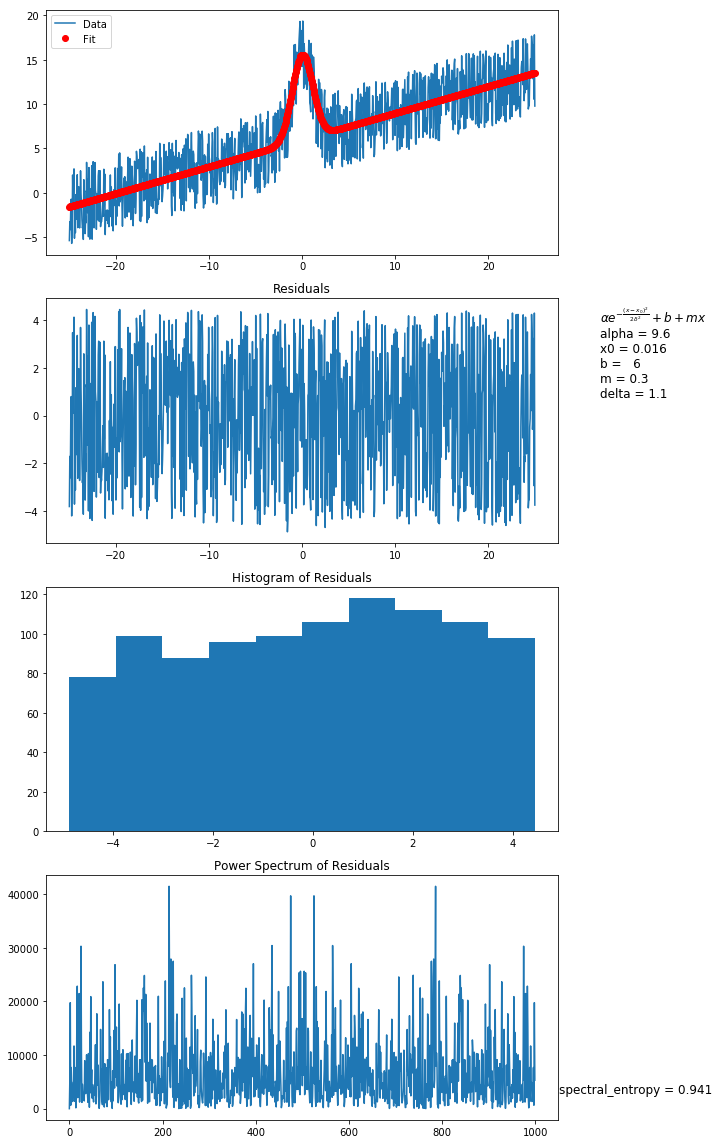

In [51]:
interact(plot_fit,
         x0=(-20,20,1),
         alpha=(-100,100,1),
         m=(-2,2,.1),
         output_noise_width=(0,10,1),output_noise_type=["normal","uniform","triangular"])

In [82]:
def plot_fit_with_signal(**options):
    defaults= {"output_noise_type":"normal",
              "output_noise_width":2,
              "output_noise_center":0,
              "m":.5,
              "b":3.4,
              "delta":1,
              "x0":10,
              "alpha":20,
              "x_min":-25,
              "x_max":25,
              "number_points":1000,
              "signal_parameters":"signal_size",
              "signal_parameter_values":{"signal_size":1.0},
              "signal_equation":"signal_size*sin(x)"}
    fit_options={}
    for key,value in defaults.iteritems():
        fit_options[key]=value
    for key,value in options.iteritems():
        fit_options[key]=value
    line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")
    gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")
    signal=FunctionalModel(parameters=fit_options["signal_parameters"],variables="x",equation=fit_options["signal_equation"])
    signal.set_parameters(**fit_options["signal_parameter_values"])
    signal_data=signal(np.linspace(fit_options["x_min"],fit_options["x_max"],fit_options["number_points"]))
    model=line+gaussian
    model_2=line+gaussian
    model.set_parameters(m=fit_options["m"],b=fit_options["b"],
                         delta=fit_options["delta"],x0=fit_options["x0"],alpha=fit_options["alpha"])
    simulated_data=DataSimulator(model=model,output_noise_type=fit_options["output_noise_type"],
                                 output_noise_width=fit_options["output_noise_width"],
                                 output_noise_center=fit_options["output_noise_center"])
    simulated_data.set_x(fit_options["x_min"],fit_options["x_max"],fit_options["number_points"])
    model_2.fit_data(simulated_data.x,simulated_data.data,**{"initial_guess":model.parameter_values})
    parameter_text="${0}$\n".format(sympy.latex(model_2.equation))
    options={'fontsize':12}
    for key,value in model_2.parameter_values.iteritems():
        parameter_text=parameter_text+"{0} = {1:3.2g} \n".format(key,value)
    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4,figsize=(8,16))
    ax0.plot(simulated_data.x,simulated_data.data+signal_data,label="Data")
    ax0.plot(simulated_data.x,model_2(simulated_data.x),"ro",label="Fit")
    ax0.legend()
    ax1.text(fit_options["x_max"]+7,
             .1,
             parameter_text,
             fontsize=12)
    residuals=simulated_data.data+signal_data-model_2(simulated_data.x)
    ax1.plot(simulated_data.x,residuals)
    ax1.set_title("Residuals")
    ax2.hist(residuals)
    ax2.set_title("Histogram of Residuals")
    power_spectrum=abs(numpy.fft.fft(residuals)*numpy.conjugate(numpy.fft.fft(residuals)))
    probability=power_spectrum/sum(power_spectrum)
    ax3.plot(power_spectrum)
    ax3.set_title('Power Spectrum of Residuals')
    ax3.text(len(residuals)+50,
             -.1,
             "spectral_entropy = {0:3.3g}\n".format(-sum(probability*numpy.log2(probability))/numpy.log2(len(probability))),
             **options)
    plt.tight_layout()
    plt.show()

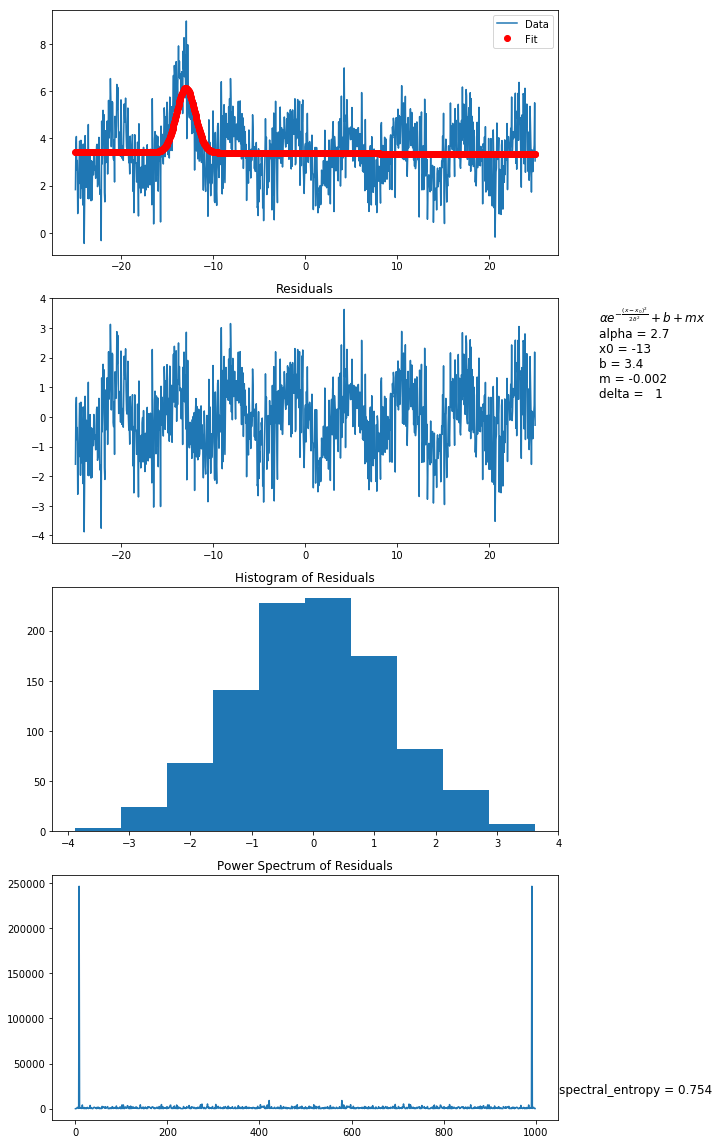

In [87]:
interact(plot_fit_with_signal,
         x0=(-20,20,1),
         alpha=(-100,100,1),
         m=(-2,2,.1),
         output_noise_width=(0,10,1),output_noise_type=["normal","uniform","triangular"],
        signal_size=(0,10,.1),signal_equation=["signal_size*sin(x)","signal_size*exp(-(x-1)**2)","signal_size*(-x**2./(x-2.)**3)"])

In [88]:
def shannon_entropy(array):
    power_spectrum=abs(numpy.fft.fft(array)*numpy.conjugate(numpy.fft.fft(array)))
    probability=power_spectrum/sum(power_spectrum)
    entropy=-sum(probability*numpy.log2(probability))/numpy.log2(len(probability))
    return entropy

In [89]:
sine=np.sin(np.linspace(-10,10,1000))
shannon_entropy(sine)

0.19070214964429286

In [93]:
normal=np.random.normal(loc=0,scale=300,size=1024)
shannon_entropy(normal)

0.93538730647484025

In [94]:
normal=np.random.normal(loc=1,scale=300,size=1024)
shannon_entropy(normal)

0.93821865609254917

In [95]:
normal=np.random.normal(loc=1,scale=1,size=1024)
shannon_entropy(normal)

0.61289189146042578

In [97]:
uniform=np.random.uniform(-1,1,size=1024)
shannon_entropy(uniform)

0.93802052932446967

In [98]:
uniform=np.random.uniform(4,5,size=1024)
shannon_entropy(uniform)

0.0074796947103301049

In [99]:
uniform=np.random.uniform(-1,1,size=10000)
shannon_entropy(uniform)

0.95400345193844061

In [100]:
uniform=np.random.uniform(-1,1,size=1000000)
shannon_entropy(uniform)

0.96936586689986837

In [ ]:
number_list=np.linspace(10,10**5,20).tolist()
random_list=[np.random.uniform(-1,1,size=length) for length in number_list]
entropy_list=map(lambda x:shannon_entropy(x),random_list)
plt.plot(number_list,entropy_list,"o")
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
